In [2]:
import os
import sys
import glob

sys.path.append("/home/giakhang/dev/pose_sandbox/Hand_pose_estimation_3D/arm_and_hand")
sys.path.append("/home/giakhang/dev/pose_sandbox/Hand_pose_estimation_3D")

from dataloader_ann import HandArmLandmarksDataset_ANN

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os
from datetime import datetime

import open3d as o3d
from utilities import convert_to_left_shoulder_coord
import time

from sklearn.preprocessing import MinMaxScaler

import pandas as pd
from csv_writer import fusion_csv_columns_name
import matplotlib.pyplot as plt

import joblib
import sklearn

import json
from leftarm_angle_calculation import calculate_six_arm_angles
from utilities import (convert_to_left_shoulder_coord,
    convert_to_wrist_coord,
    flatten_two_camera_input)
from angle_noise_reducer import AngleNoiseReducer

In [3]:
arm_hand_fused_names = ["left shoulder", "left elbow", "left hip", "right shoulder", "right hip", 
 "WRIST", "THUMB_CMC", "THUMB_MCP", "THUMB_IP", "THUMB_TIP", "INDEX_FINGER_MCP", 
 "INDEX_FINGER_PIP", "INDEX_FINGER_DIP", "INDEX_FINGER_TIP", "MIDDLE_FINGER_MCP", 
 "MIDDLE_FINGER_PIP", "MIDDLE_FINGER_DIP", "MIDDLE_FINGER_TIP", "RING_FINGER_MCP", 
 "RING_FINGER_PIP", "RING_FINGER_DIP", "RING_FINGER_TIP", "PINKY_MCP", "PINKY_PIP", 
 "PINKY_DIP", "PINKY_TIP", "right elbow"]

In [4]:
measure_noise_csv_files = [
    "/home/giakhang/dev/pose_sandbox/data/2024-09-30/2024-09-30-17:09/landmarks_all_2024-09-30-17:09.csv",
    "/home/giakhang/dev/pose_sandbox/data/2024-09-30/2024-09-30-17:23/landmarks_all_2024-09-30-17:23.csv",
    "/home/giakhang/dev/pose_sandbox/data/2024-09-30/2024-09-30-17:25/landmarks_all_2024-09-30-17:25.csv",
    "/home/giakhang/dev/pose_sandbox/data/2024-09-30/2024-09-30-17:26/landmarks_all_2024-09-30-17:26.csv",
    "/home/giakhang/dev/pose_sandbox/data/2024-09-30/2024-09-30-17:27/landmarks_all_2024-09-30-17:27.csv",
    "/home/giakhang/dev/pose_sandbox/data/2024-09-30/2024-09-30-17:28/landmarks_all_2024-09-30-17:28.csv"
]

In [6]:
statistical_file = "/home/giakhang/dev/pose_sandbox/Hand_pose_estimation_3D/arm_and_hand/angles_stats_6_dim.json"
dim = 6
angle_noise_reducer = AngleNoiseReducer(angles_noise_statistical_file=statistical_file, dim=dim)

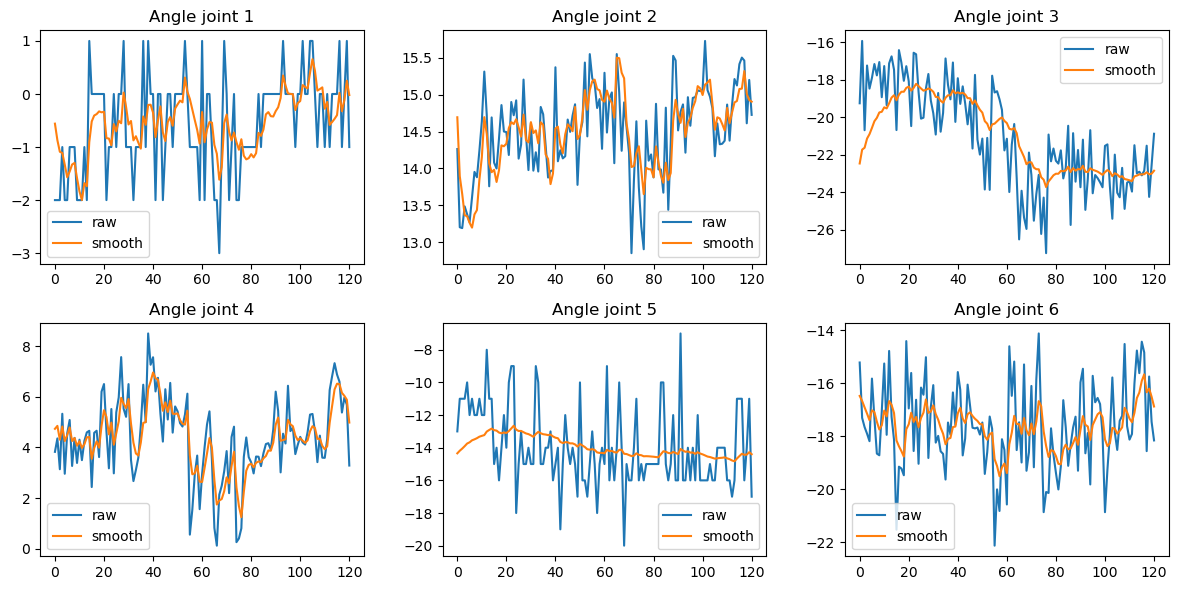

In [20]:
data = pd.read_csv(measure_noise_csv_files[0])

raw_angles_through_frame = []
filtered_angles_through_frame = []

total_rows = len(data)

start_idx = total_rows // 4  
end_idx = start_idx + total_rows // 2  

middle_data = data.iloc[start_idx:end_idx]
gt_data = middle_data.iloc[:, 323:].values
gt_data = gt_data.reshape(-1, 3, 48)
gt_data = np.transpose(gt_data, (0, 2, 1))

angles_through_frame = []
for i in range(gt_data.shape[0]):
    arm_hand_XYZ_wrt_shoulder, xyz_origin = convert_to_left_shoulder_coord(
        gt_data[i],
        arm_hand_fused_names)

    angles, _, _ = calculate_six_arm_angles(arm_hand_XYZ_wrt_shoulder,
        xyz_origin,
        arm_hand_fused_names)
    angles = np.array(angles)
    filtered_angles = angle_noise_reducer(angles)

    raw_angles_through_frame.append(angles)
    filtered_angles_through_frame.append(filtered_angles)

raw_angles_through_frame = np.array(raw_angles_through_frame)
filtered_angles_through_frame = np.array(filtered_angles_through_frame)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axes = axes.flatten()

for i in range(6):
    ax = axes[i]
    raw_joint_i_angles = raw_angles_through_frame[:, i]
    smooth_joint_i_angles = filtered_angles_through_frame[:, i]
    ax.plot(raw_joint_i_angles)
    ax.plot(smooth_joint_i_angles)
    title = "Angle joint {}".format(i + 1)
    ax.set_title(title)
    ax.legend(['raw', 'smooth'])

plt.tight_layout()
plt.show()

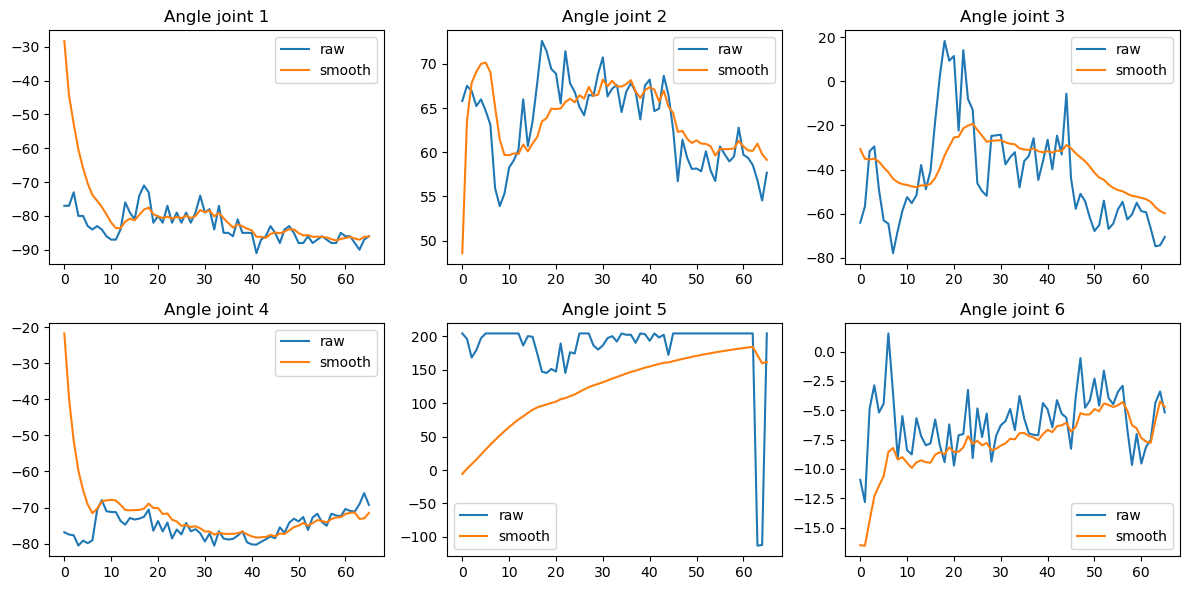

In [21]:
data = pd.read_csv(measure_noise_csv_files[1])

raw_angles_through_frame = []
filtered_angles_through_frame = []

total_rows = len(data)

start_idx = total_rows // 4  
end_idx = start_idx + total_rows // 2  

middle_data = data.iloc[start_idx:end_idx]
gt_data = middle_data.iloc[:, 323:].values
gt_data = gt_data.reshape(-1, 3, 48)
gt_data = np.transpose(gt_data, (0, 2, 1))

angles_through_frame = []
for i in range(gt_data.shape[0]):
    arm_hand_XYZ_wrt_shoulder, xyz_origin = convert_to_left_shoulder_coord(
        gt_data[i],
        arm_hand_fused_names)

    angles, _, _ = calculate_six_arm_angles(arm_hand_XYZ_wrt_shoulder,
        xyz_origin,
        arm_hand_fused_names)
    angles = np.array(angles)
    filtered_angles = angle_noise_reducer(angles)

    raw_angles_through_frame.append(angles)
    filtered_angles_through_frame.append(filtered_angles)

raw_angles_through_frame = np.array(raw_angles_through_frame)
filtered_angles_through_frame = np.array(filtered_angles_through_frame)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axes = axes.flatten()

for i in range(6):
    ax = axes[i]
    raw_joint_i_angles = raw_angles_through_frame[:, i]
    smooth_joint_i_angles = filtered_angles_through_frame[:, i]
    ax.plot(raw_joint_i_angles)
    ax.plot(smooth_joint_i_angles)
    title = "Angle joint {}".format(i + 1)
    ax.set_title(title)
    ax.legend(['raw', 'smooth'])

plt.tight_layout()
plt.show()